# Вычисление NDVI, используя спутниковые данные

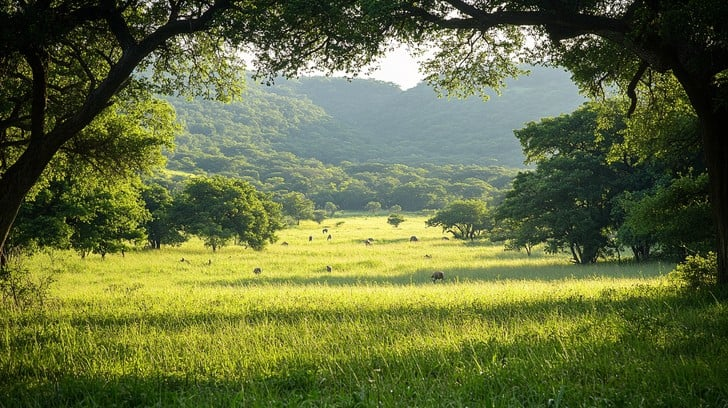

Для подсчета NDVI я выбрал спутниковый снимок Владимирской области с сайта usgs.gov. NDVI рассчитывается по следующей формуле:

$$NDVI = \frac{NIR - RED}{NIR + RED}$$

**NIR** — отражение в ближней инфракрасной области спектра\
**RED** — отражение в красной области спектра

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
from google.colab import drive
drive.mount('/content/drive')

gdal.UseExceptions()
filterwarnings('ignore', category=RuntimeWarning)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


В скачанном файле Band 5 соответсвтует инфракрасной области спектра, а Band 4 — красной. Откроем соответствующие файлы из датасета и представим каждый канал в качестве ndarray массива.

#Band 4:

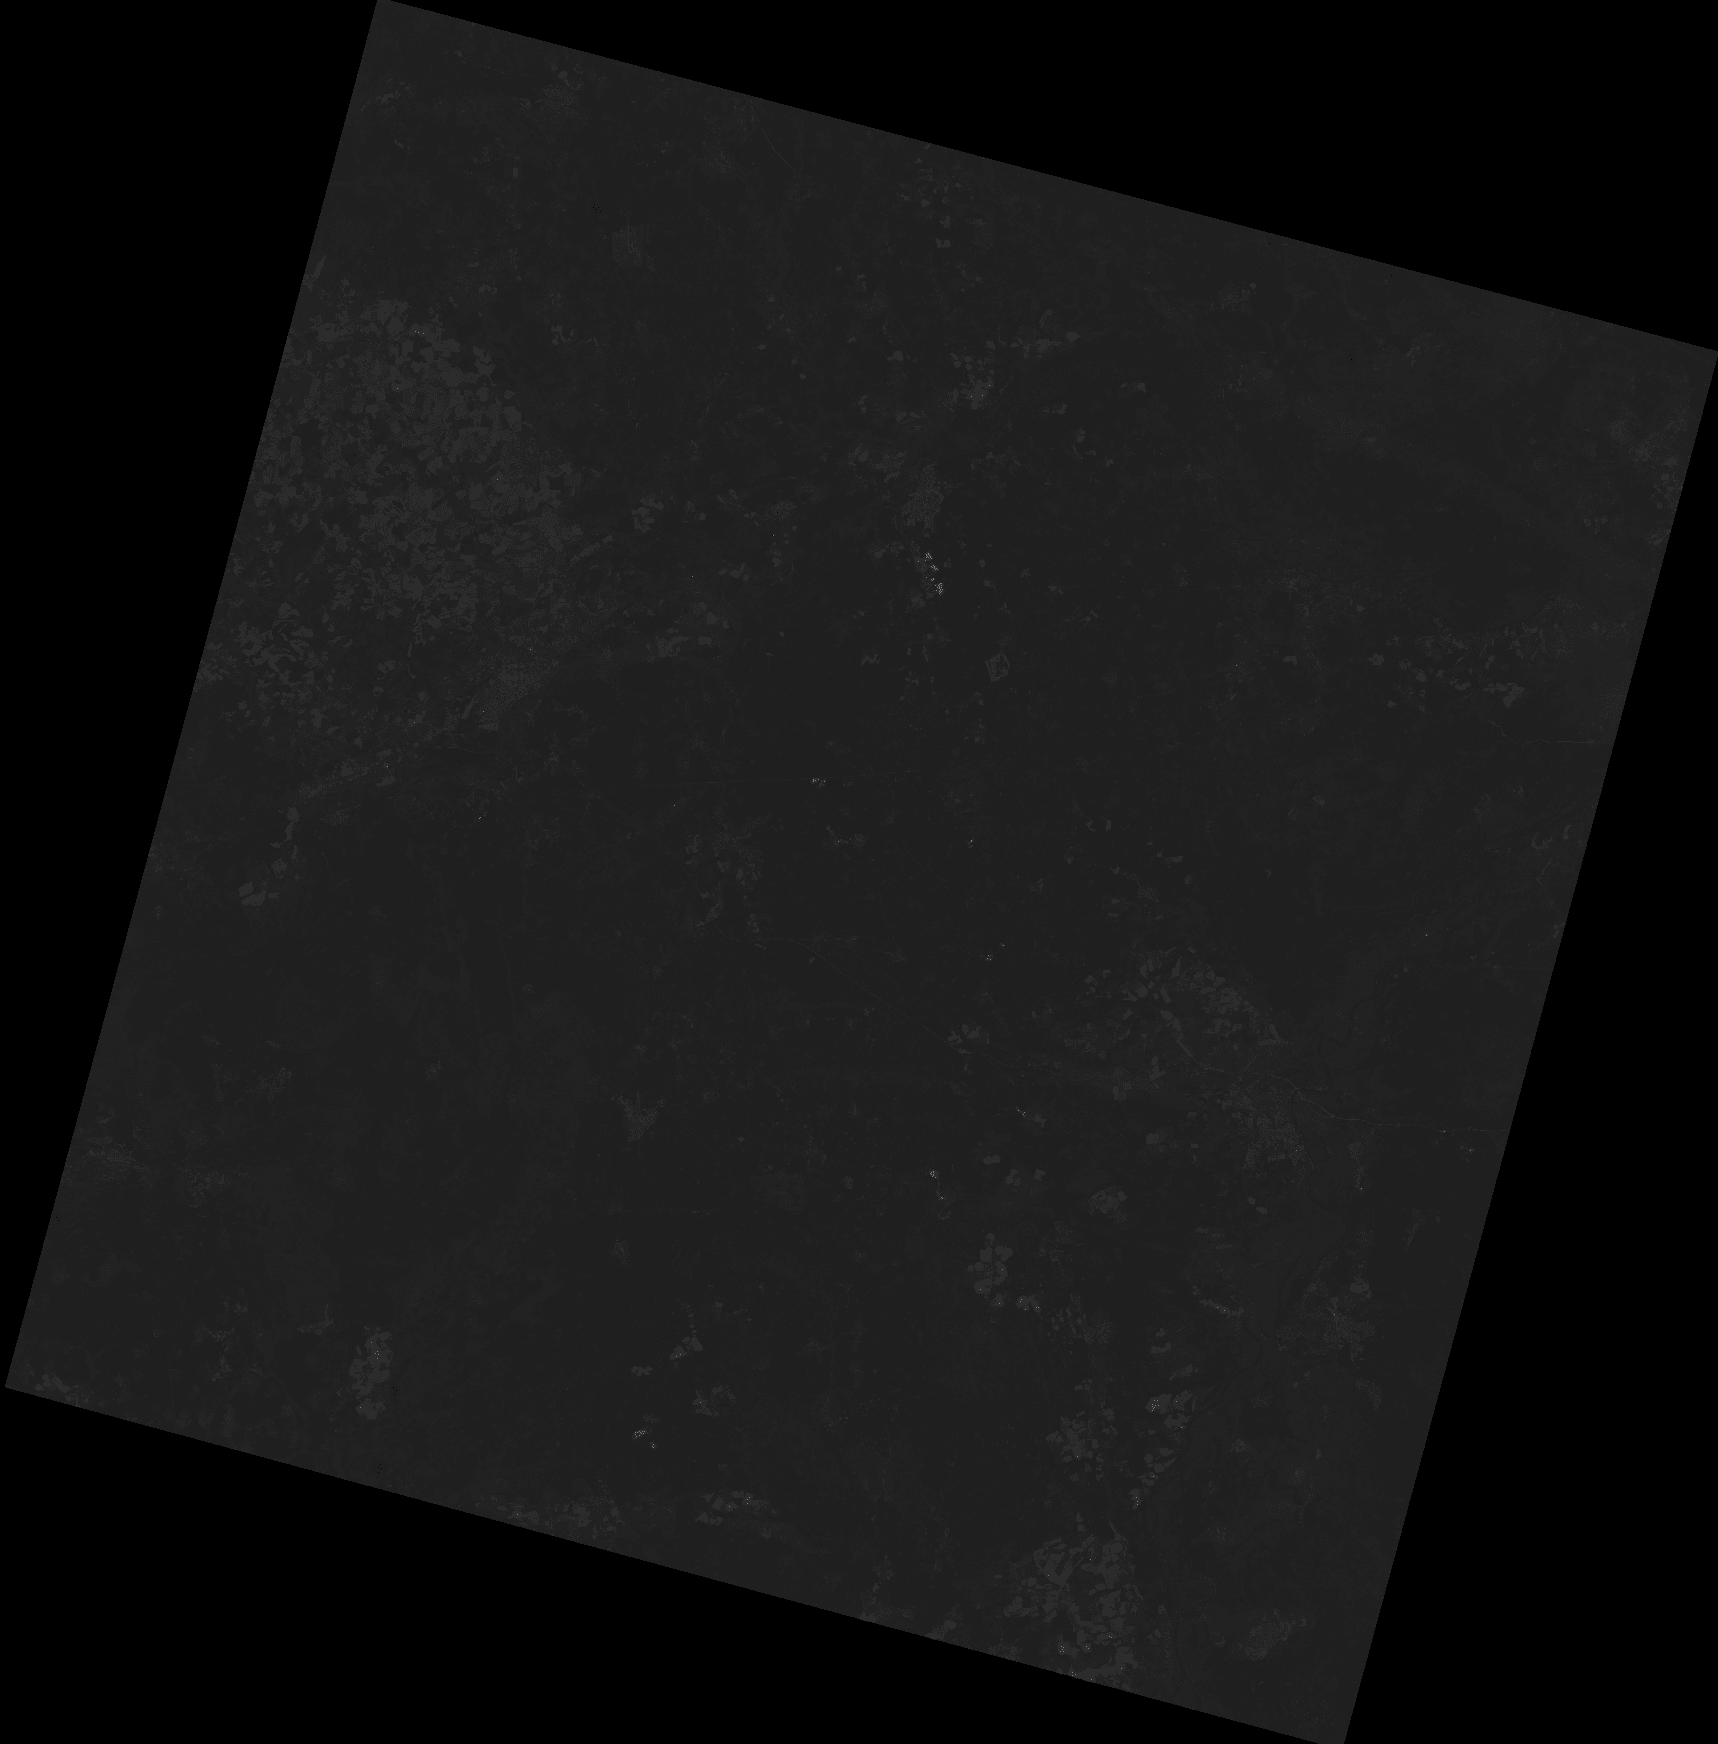

# Band 5:

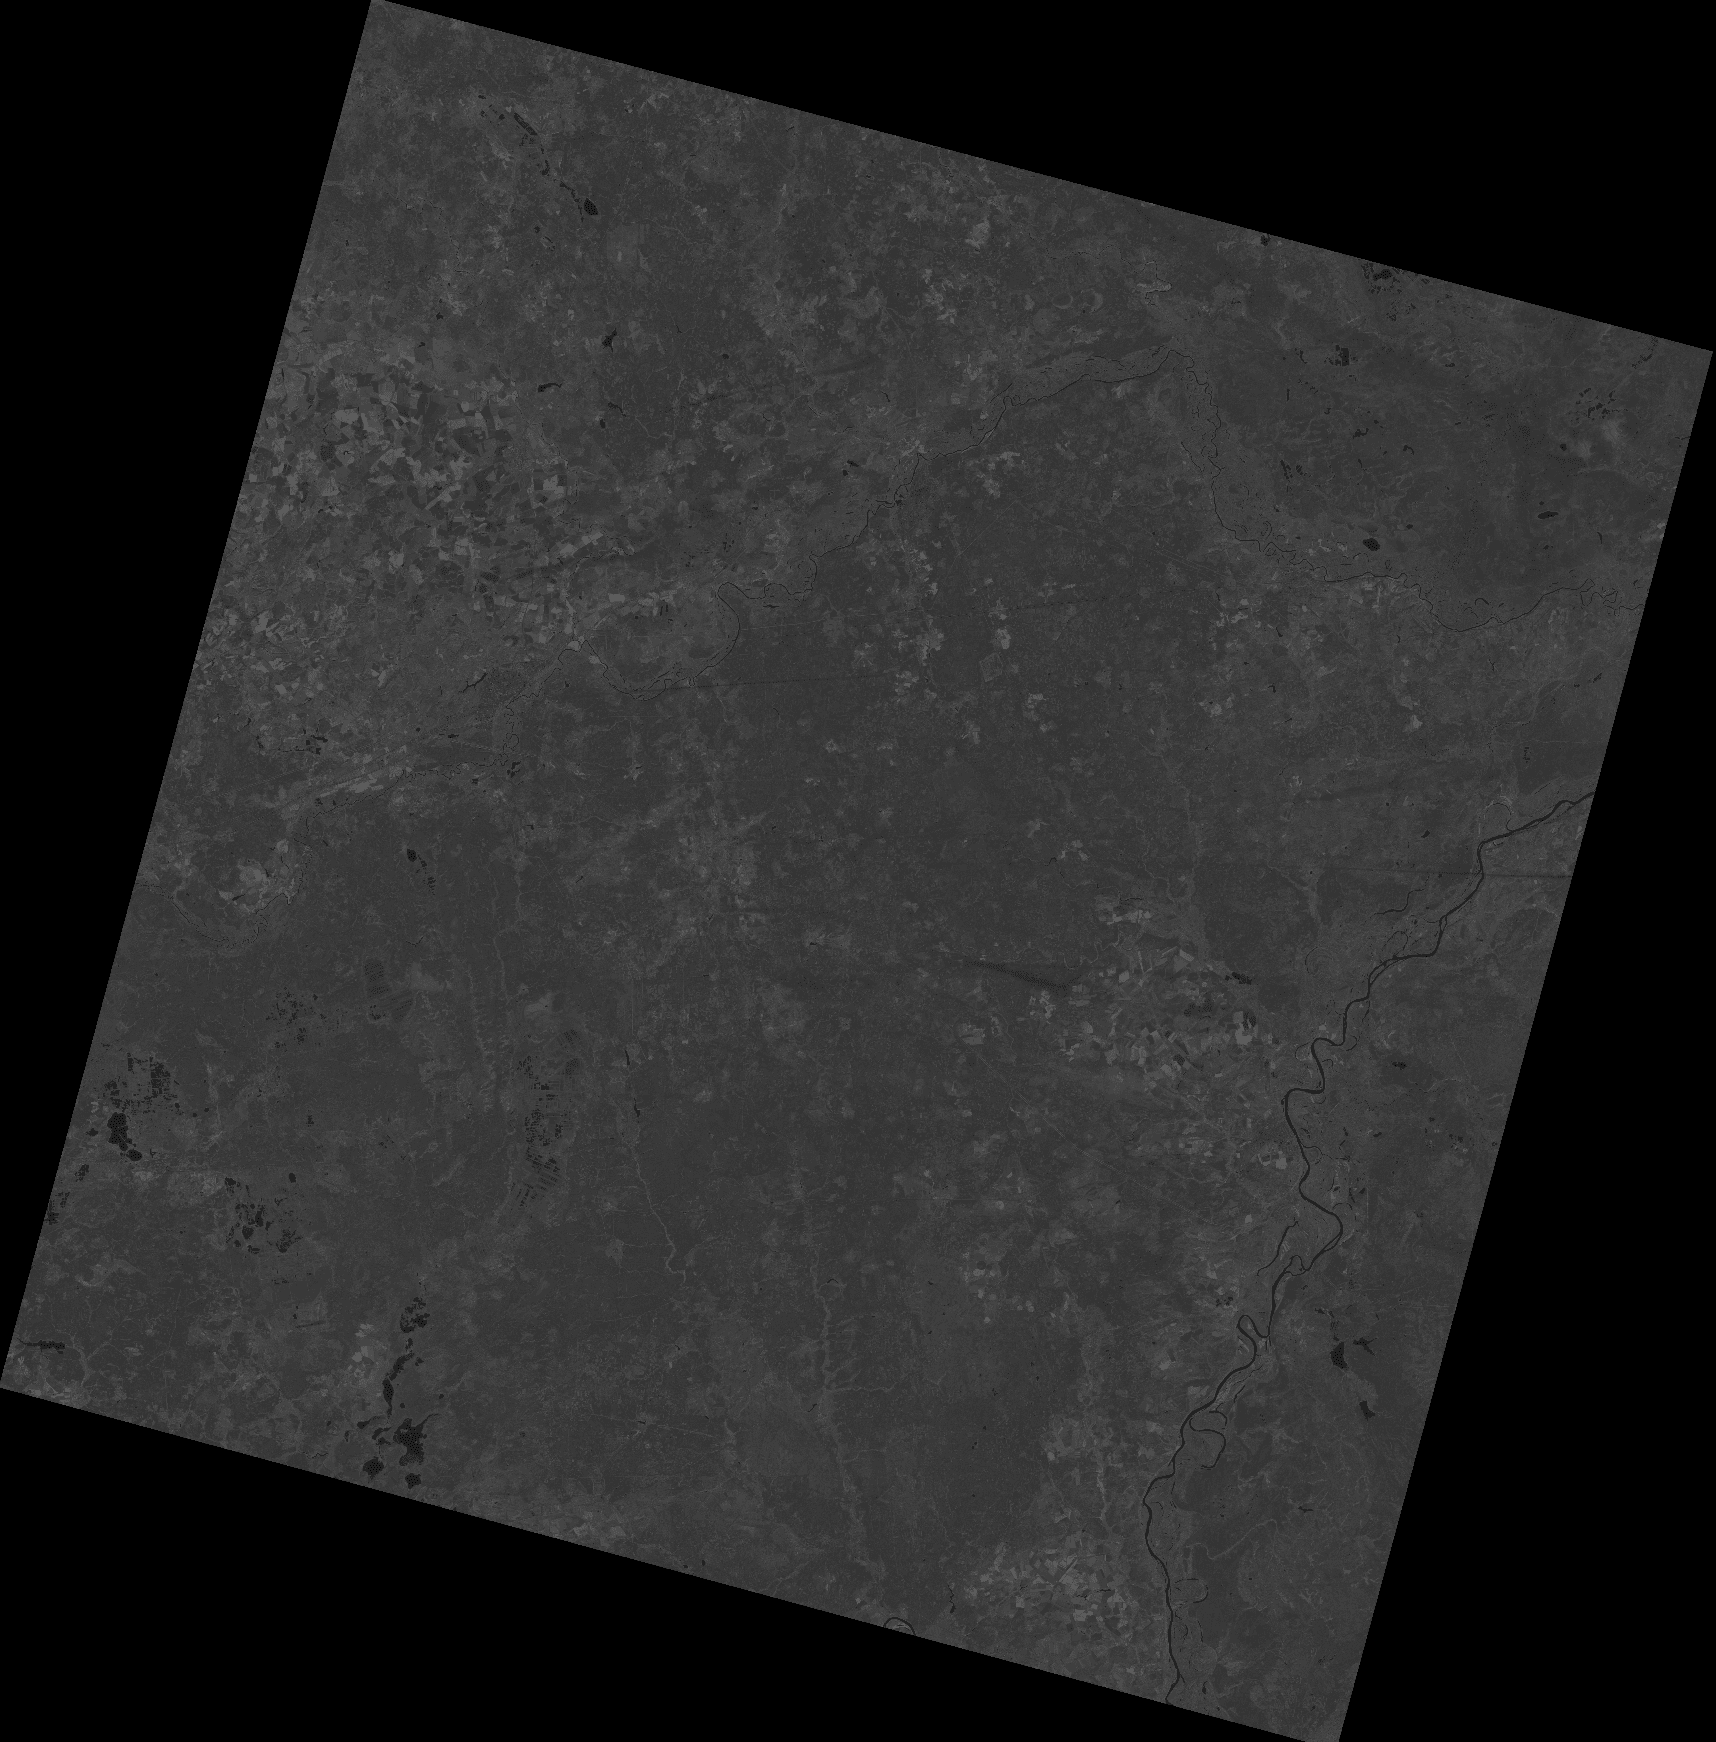

In [11]:
red_band = gdal.Open('/content/drive/MyDrive/LC09_L2SP_176021_20250913_20250915_02_T1/LC09_L2SP_176021_20250913_20250915_02_T1_SR_B4.TIF')
nir_band = gdal.Open('/content/drive/MyDrive/LC09_L2SP_176021_20250913_20250915_02_T1/LC09_L2SP_176021_20250913_20250915_02_T1_SR_B5.TIF')
red_array = red_band.GetRasterBand(1).ReadAsArray()
nir_array = nir_band.GetRasterBand(1).ReadAsArray()

В обоих массивах присутствуют нули. Найдеём, сколько процентов составляет их количество по отношению ко всем данным в массивах

In [3]:
float(np.sum(red_array == 0) / red_array.size * 100), float(np.sum(nir_array == 0) / nir_array.size * 100)

(34.859844673885306, 34.85983670456921)

Видно, что в обоих массивах практически одинаковое количество нулей и они заполняют треть соответствующих массивов. Заметим, что на спутниковых снимках изображения скошены, поэтому в углах и находятся нули.

In [4]:
int(red_array.min()), int(red_array.max())

(0, 65454)

In [5]:
int(nir_array.min()), int(nir_array.max())

(0, 64900)

Построим NDVI-карту

In [6]:
ndvi = (nir_array.astype(float) - red_array.astype(float)) / (nir_array.astype(float) + red_array.astype(float))

Теперь проверим, чтобы все значения подпадали под диапазон от -1 до 1.

In [7]:
float(np.nanmin(ndvi)), float(np.nanmax(ndvi))

(-0.20312737980403106, 1.0)

In [9]:
ndvi

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

Наконец, визуализируем полученную NDVI-карту, используя жёлто-зелёную палитру (YlGn).

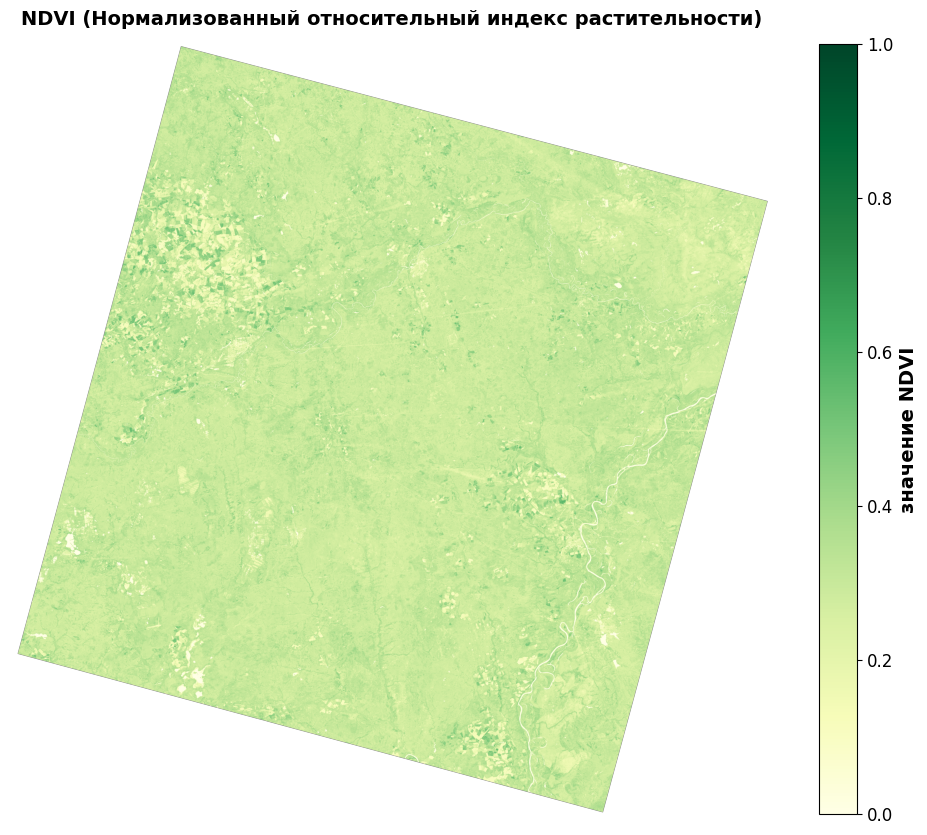

In [10]:
fig, axes = plt.subplots(figsize=(12, 10))
im = axes.imshow(ndvi, cmap='YlGn', vmin=0.0, vmax=1.0)
axes.axis('off')

cbar = plt.colorbar(im, ax=axes, fraction=0.05, pad=0.05)
cbar.set_label('значение NDVI', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=12)

axes.set_title('NDVI (Нормализованный относительный индекс растительности)',
             fontsize=14, fontweight='bold', pad=14)

plt.show()